# Practice Lab: Neural Networks for Handwritten Digit Recognition, Multiclass

In this exercise, you will use a neural network to recognize the hand-written digits 0-9.

*Warning: this notebook contains only PyTorch implementation*.

# Outline
- [ 1 - Packages ](#1)
- [ 4 - Neural Networks](#4)
  - [ 4.1 Problem Statement](#4.1)
  - [ 4.2 Dataset](#4.2)
  - [ 4.3 Model representation](#4.3)
  - [ 4.4 PyTorch Model Implementation](#4.4)
  - [ 4.5 Softmax placement](#4.5)
    - [ Exercise](#ex02)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells.
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [pytorch](https://pytorch.org/) is a popular platform for machine learning.

In [ ]:
!pip install ipympl  # it's not a defaultly installed package in google colab, therefore, let's install it

In [2]:
import numpy as np
import torch
from torch import nn

%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU).
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

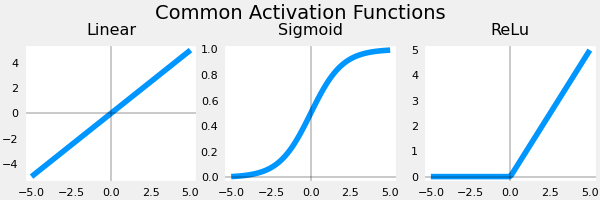

In [4]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering. This is examined more in the supporting optional lab.

<a name="3"></a>
## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.


The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

<a name="4"></a>
## 4 - Neural Networks

In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.


<a name="4.1"></a>
### 4.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.


<a name="4.2"></a>
### 4.2 Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training examples becomes a single row in our data matrix `X`.
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

*Since I am working in google colab, I am mounting drive to be able to access the data from the my google drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My Drive/  # Replace with your path

In [7]:
!ls

data


In [8]:
# load dataset

X, y = load_data()

#### 4.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.  

In [9]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [10]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [11]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

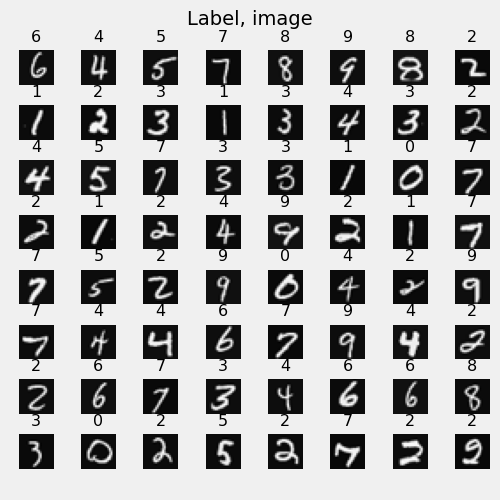

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below.
- This has two dense layers with ReLU activations followed by an output layer with a linear activation.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    


- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention:
               

<a name="4.4"></a>
### 4.4 PyTorch Model Implementation


In [13]:
model = nn.Sequential(
    nn.Linear(400, 25),
    nn.ReLU(),
    nn.Linear(25, 15),
    nn.ReLU(),
    nn.Linear(15, 10),
  )


In [14]:
print(model)

Sequential(
  (0): Linear(in_features=400, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=10, bias=True)
)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 10), b3 shape = (10,)
```

The following code:
* defines a loss function, `CrossEntropyLoss`.

*There are two equally legit ways of implementing multiclass classification with CrossEntropy: either with the linear layer as the last activation layer and CrossEntropyLoss as a criterion (aka loss function); or with LogSoftmax layer as the last activation layer and NNNLoss criterion. The former applies log-softmax internally. [Explanation from the forum](https://discuss.pytorch.org/t/difference-between-cross-entropy-loss-or-log-likelihood-loss/38816), [Cheetsheet](https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/other/pytorch-lossfunc-cheatsheet.md).*

*Here, I am using the linear layer as an activation function and CrossEntropyLoss.*

* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [15]:
loss_fn = nn.CrossEntropyLoss()

# move the model to GPU if we have one
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

BATCH_SIZE = 32
EPOCHS = 40

*Let's define a custom Dataset class to be able to use Dataloader class from PyTorch for easy access to the data in batches*

In [16]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long().squeeze() # Squeeze to turn it into 1D array, needed for loss_fn

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_dataset = CustomDataset(X, y)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True  # Reshuffle the data at every epoch to reduce model overfitting
)

*Define a function which will train the model for one epoch.*

In [17]:
from tqdm import tqdm  # for printing ETA

TRAINING_LOSS = []  # to keep track of loss at each batch
TRAINING_ACCURACY = []


def train_one_epoch(epoch):
    model.train()

    # with tqrm allows to create a wrapper around train_dataloader in order to see the progress in batches
    with tqdm(train_loader, total=len(X)//BATCH_SIZE+1, unit="batch", desc=f'Epoch {epoch+1}') as batches:
        for batch in batches:
          # unpack each batch into X and y
          inputs, labels = batch

          # move the data to GPU if we have one

          if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

          # Zero your gradients for every batch!
          optimizer.zero_grad()

          # Make predictions for this batch -- calling forward() internally
          outputs = model(inputs)

          # Compute the loss and its gradients
          loss = loss_fn(outputs, labels)
          loss.backward()

          # Adjust learning weights
          optimizer.step()

          # outputs.argmax picks one label with the highest value of logits and assigns it to the datapoint
          accuracy = (outputs.argmax(dim=1) == labels).float().mean().item() * 100

          TRAINING_LOSS.append(loss.item())
          TRAINING_ACCURACY.append(accuracy)

          batches.set_postfix(loss=loss.item(), accuracy=f'{accuracy}%')                  # Update the progress bar


In [18]:
for epoch in range(EPOCHS):
    train_one_epoch(epoch)

Epoch 40: 100%|██████████| 157/157 [00:01<00:00, 143.71batch/s, accuracy=100.0%, loss=0.016]


#### Epochs and batches
In the *training loop* above, the number of `epochs` was set to 40. This specifies that the entire data set should be applied during training 40 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1: 100%|██████████| 157/157 [00:00<00:00, 193.00batch/s, accuracy=62.5%, loss=1.19]
```
The first line, `Epoch 1/40`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. *Since the default size of a batch in Tensorflow is 32, I set the size of the batch here to 32 as well*. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases.

*Since I couldn't find the definition of `plot_loss_tf` (not imported anywhere in the notebook) and anyways loss is stored in PyTorch differently than in tensorflow, I am gonna plot loss and accuracy using my own code.*

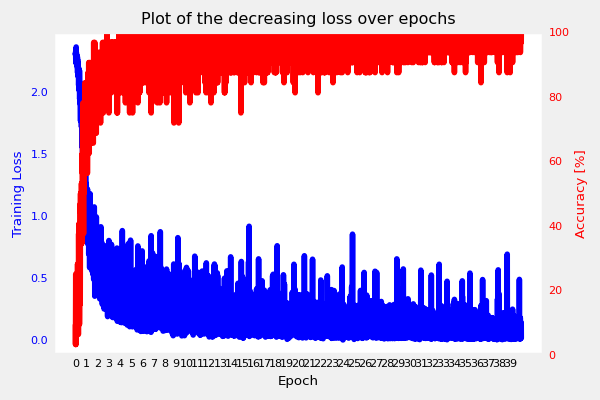

In [19]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot of the decreasing loss over epochs")
ax.plot(TRAINING_LOSS, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(TRAINING_ACCURACY, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(TRAINING_ACCURACY), len(X)//BATCH_SIZE+1)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

#### Prediction
To make a prediction, *let's define a custom function*.

In [20]:
def predict(x: np.ndarray):
  x = torch.from_numpy(x).float()
  model.eval()  # set the model to evaluation mode
  with torch.no_grad():  # Disable gradient calculation for inference
      predictions = model(x)
  return predictions

Below, X[1015] contains an image of a two.

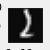

 predicting a Two: 
tensor([ -7.6979,   2.7410,   4.9727,   1.3388, -10.3758, -12.0036,  -3.7014,
          1.4992,  -3.5442,  -9.4925])
 Largest Prediction index: 2


In [21]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = predict(image_of_two)

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [22]:
softmax = nn.Softmax()
prediction_p = softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {torch.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
tensor([2.6968e-06, 9.2136e-02, 8.5826e-01, 2.2670e-02, 1.8528e-07, 3.6385e-08,
        1.4673e-04, 2.6614e-02, 1.7170e-04, 4.4821e-07])
Total of predictions: 1.000


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function — *but can also be done in PyTorch, as it is below*.

In [23]:
yhat = torch.argmax(prediction_p)

print(f"torch.argmax(prediction_p): {yhat}")

torch.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


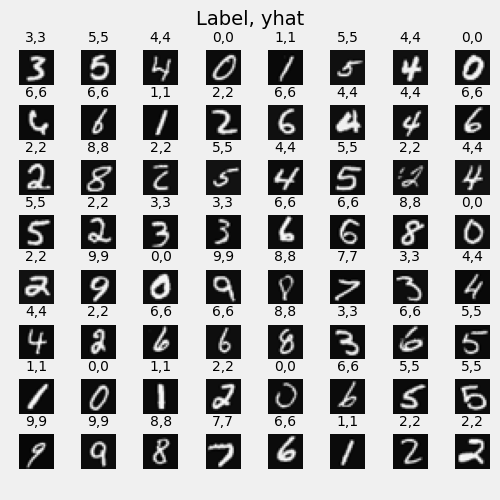

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = predict(X[random_index])
    prediction_p = softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Let's look at some of the errors.
>Note: increasing the number of training epochs can eliminate the errors on this data set.

In [25]:
all_predictions = predict(X).numpy()
errors = np.sum(all_predictions.argmax(axis=1) != y.squeeze())
print(f"Number of errors: {errors} out of {len(X)} examples")



Number of errors: 47 out of 5000 examples


*This is a bit more than in the original lab but it works fine.*

### Congratulations!
*You have looked through the reimplemented assignment in PyTorch.*